## Predictions on Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### loading the train data

In [2]:
df_train = pd.read_csv('../data/preprocessed/outliers/outliers_train.csv')
df_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2.0,3897.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7.0,7662.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19.0,13882.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5.0,6218.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4.0,13302.0


In [3]:
X = df_train.drop('price', axis = 1)
y = df_train['price']

In [4]:
X.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4.0


In [5]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: price, dtype: float64

In [6]:
print(f"{X.shape} :: {y.shape}")

(10681, 15) :: (10681,)


### making then train and test data from df_train

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
print(f"{X_train.shape} : {y_train.shape} :: {X_test.shape} : {y_test.shape}")

(8010, 15) : (8010,) :: (2671, 15) : (2671,)


### loading the df_test as new test data

In [10]:
X_test_new = pd.read_csv('../data/preprocessed/outliers/outliers_test.csv')
X_test_new.drop('Unnamed: 0', axis = 1, inplace = True)
X_test_new.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,6,2019,17,30,4,25,10.0
1,3,3,1.0,1,0,0,1,12,5,2019,6,20,10,20,4.0
2,4,4,1.0,0,1,0,0,21,5,2019,19,15,19,0,23.0
3,4,4,1.0,0,0,1,1,21,5,2019,8,0,21,0,13.0
4,2,2,3.0,0,0,1,1,24,6,2019,23,55,2,45,2.0


In [11]:
X_test_new.shape

(2670, 15)

## Predictions

In [14]:
### will be doing the same as I did with the normal data, will be testing for the datasets from df_train
### checking the graphs and then making the predictions on the new unseen data which is X_test_new in our case

### graphs and metrices

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

In [15]:
def metrices(y_test, y_pred) : 
    print(f"R2 score : {r2_score(y_test, y_pred)}")
    print(f"mean_absolute_error : {mean_absolute_error(y_test, y_pred)}")
    print(f"root_mean_squared_error : {root_mean_squared_error(y_test, y_pred)}")
    print(f"mean_squared_error : {mean_squared_error(y_test, y_pred)}")

In [18]:
def plot_graphs(y_test, y_pred):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linewidth=2, label='Perfect Prediction Line')
    plt.title(f'Actual vs Predicted Value ')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.legend()
   
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.title(f'Trend Comparison')
    plt.xlabel('Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.show()

In [20]:
def pred_and_plot(model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrices(y_test, y_pred)
    plot_graphs(y_test, y_pred)

### 1. Linear regression 

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

R2 score : 0.6030479626937189
mean_absolute_error : 1978.0808028029985
root_mean_squared_error : 2723.843144166869
mean_squared_error : 7419321.4740248555


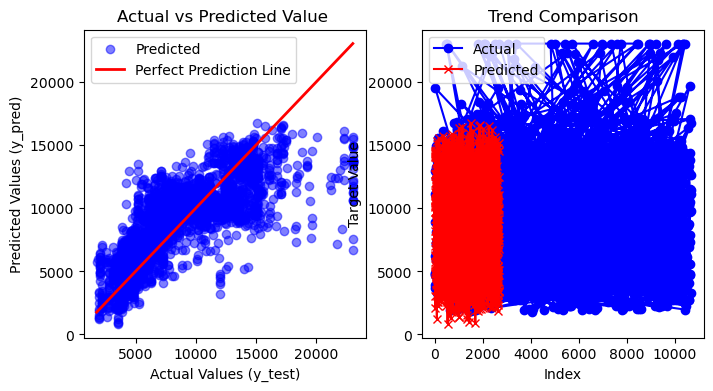

In [21]:
pred_and_plot(lr)

### 2. Suppert vector regressor

R2 score : -0.019028690319464525
mean_absolute_error : 3572.519021637961
root_mean_squared_error : 4364.216457897384
mean_squared_error : 19046385.29138239


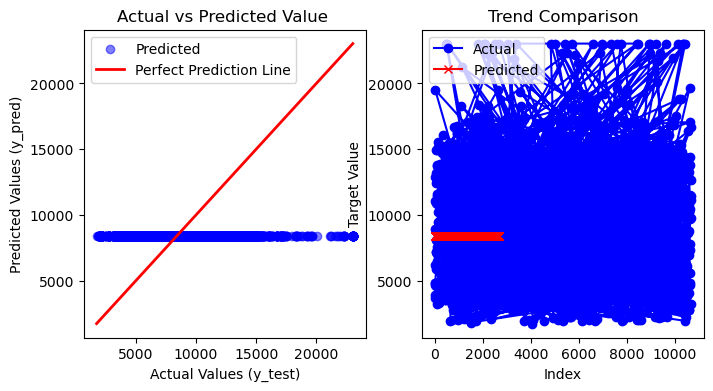

In [22]:
from sklearn.svm import SVR
svr = SVR()
pred_and_plot(svr)

### 3. KNN

R2 score : 0.6275600544077395
mean_absolute_error : 1778.4566828903032
root_mean_squared_error : 2638.4034380746584
mean_squared_error : 6961172.702044178


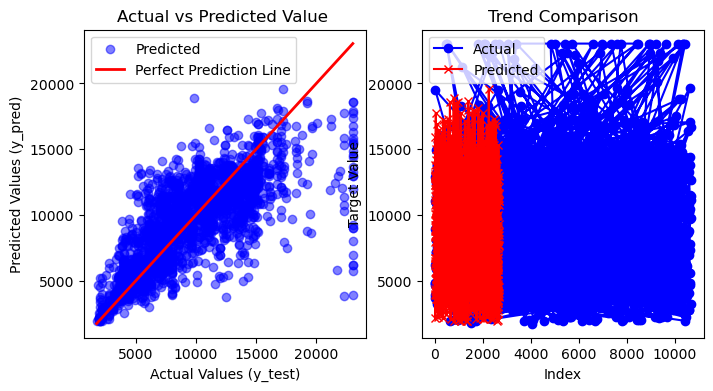

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
pred_and_plot(knn)

### 4. Decision tree regressor

R2 score : 0.855517518432394
mean_absolute_error : 738.5766254835892
root_mean_squared_error : 1643.3144461962636
mean_squared_error : 2700482.369077333


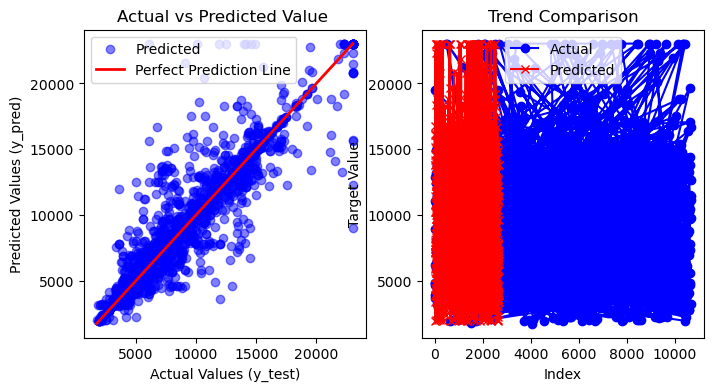

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
pred_and_plot(dtr)

### 5. Random forest regressor

R2 score : 0.9151203188946397
mean_absolute_error : 648.5473109773458
root_mean_squared_error : 1259.5486494812374
mean_squared_error : 1586462.8004100092


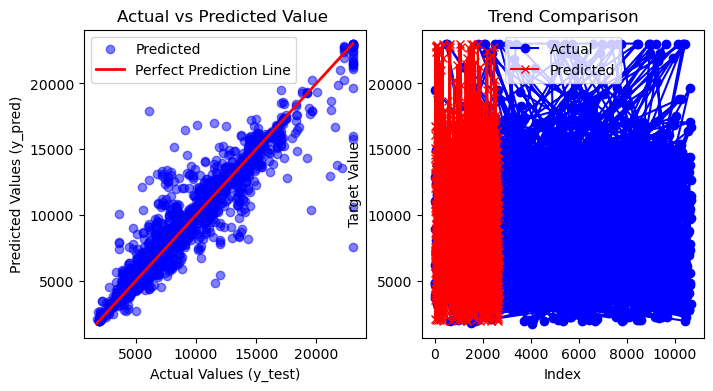

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
pred_and_plot(rfr)

### 6. Adaboost regressor

R2 score : 0.6600757369947619
mean_absolute_error : 1973.5478514828671
root_mean_squared_error : 2520.6013195060273
mean_squared_error : 6353431.011895525


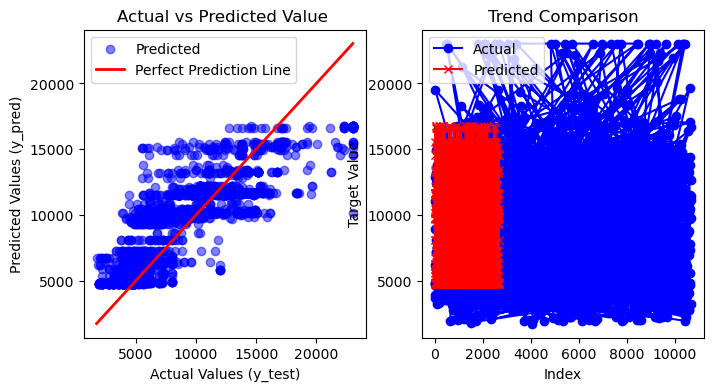

In [26]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
pred_and_plot(abr)

### 7. Gradient boost

R2 score : 0.8155696174913698
mean_absolute_error : 1274.3383603683733
root_mean_squared_error : 1856.6468728908635
mean_squared_error : 3447137.610615422


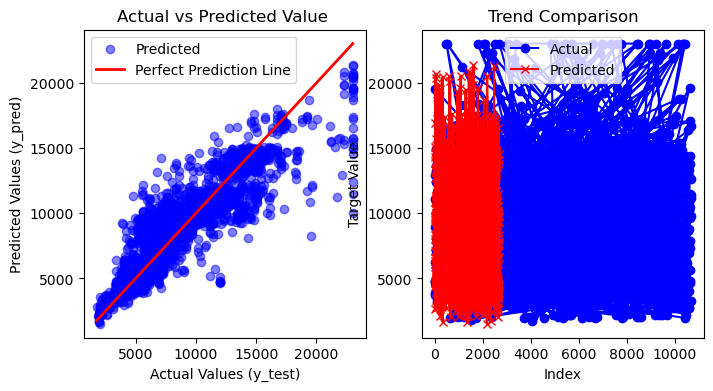

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
pred_and_plot(gbr)

## Predictions : X_test_new

In [48]:
### this time on X_test_new instead of using the 2 algorithms like last time, 
### we will only use Random forest as the baseline and then compare the results
### it's because after removing the outliers the results are more clear cut

### Random forest : baseline

In [28]:
y_pred_rfr_new = rfr.predict(X_test_new)

In [29]:
y_pred_rfr_new

array([14709.23,  4226.  , 12898.  , ..., 15680.  , 13167.61,  7652.85])

### defining a general function to save time

In [31]:
def predict_and_plot_new(algo, X_test_new, y_pred_rfr_new) : 
    y_pred_algo = algo.predict(X_test_new)
    print(f"algorithm : {algo}")
    metrices(y_pred_algo, y_pred_rfr_new)
    plot_graphs(y_pred_rfr_new, y_pred_algo)

### 1. Linear regression

algorithm : LinearRegression()
R2 score : 0.4306774663266557
mean_absolute_error : 1853.359955891584
root_mean_squared_error : 2488.082296973464
mean_squared_error : 6190553.51651275


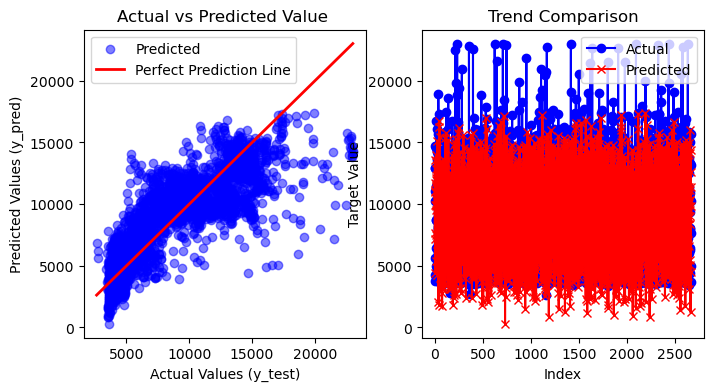

In [32]:
predict_and_plot_new(lr, X_test_new, y_pred_rfr_new)

### 2. SVR

algorithm : SVR()
R2 score : -350579780.2211934
mean_absolute_error : 3421.7891590310555
root_mean_squared_error : 4148.49178129986
mean_squared_error : 17209984.059512485


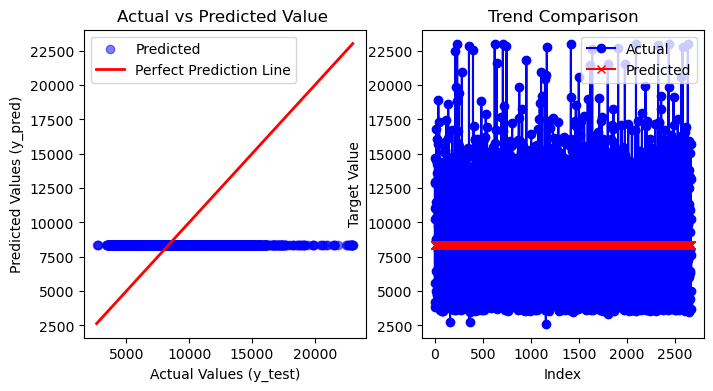

In [33]:
predict_and_plot_new(svr, X_test_new, y_pred_rfr_new)

### 3. KNN 

algorithm : KNeighborsRegressor()
R2 score : 0.5753380881899178
mean_absolute_error : 1596.5472646006617
root_mean_squared_error : 2355.8526726520035
mean_squared_error : 5550041.815241588


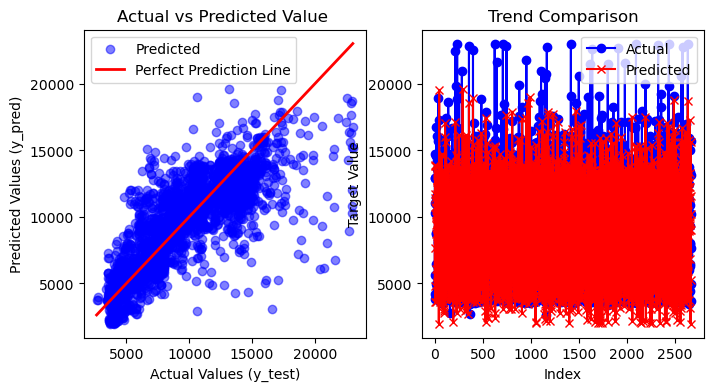

In [34]:
predict_and_plot_new(knn, X_test_new, y_pred_rfr_new)

### 4. Decision tree regressor

algorithm : DecisionTreeRegressor()
R2 score : 0.9338185133032049
mean_absolute_error : 568.8440859238451
root_mean_squared_error : 1125.689177496335
mean_squared_error : 1267176.1243323754


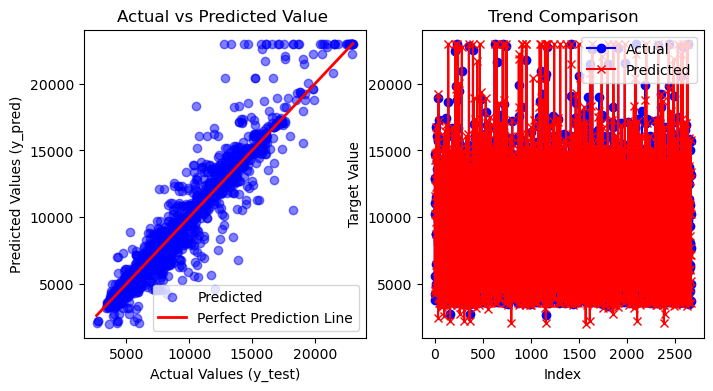

In [35]:
predict_and_plot_new(dtr, X_test_new, y_pred_rfr_new)

### 5. Adaboost regressor

algorithm : AdaBoostRegressor()
R2 score : 0.5506728512243768
mean_absolute_error : 1737.9996843554757
root_mean_squared_error : 2170.294953656234
mean_squared_error : 4710180.185865716


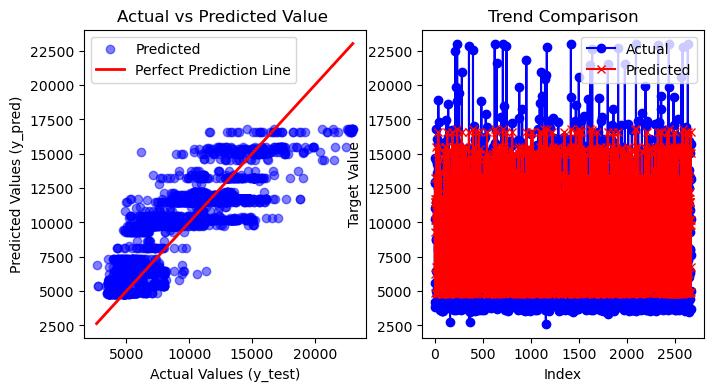

In [36]:
predict_and_plot_new(abr, X_test_new, y_pred_rfr_new)

### 6. Gradient boost regressor

algorithm : GradientBoostingRegressor()
R2 score : 0.8366079560017469
mean_absolute_error : 1032.232317631677
root_mean_squared_error : 1455.6261346757235
mean_squared_error : 2118847.4439509874


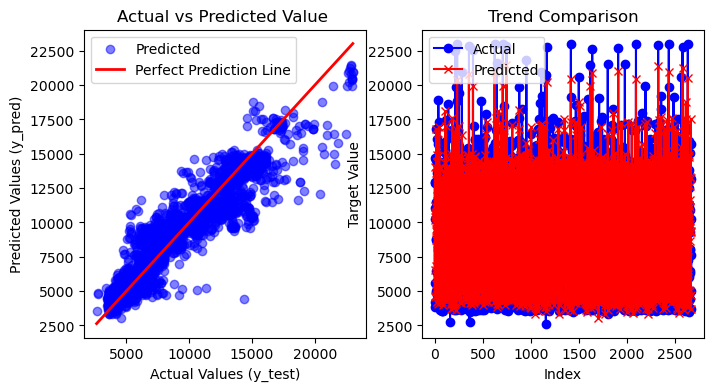

In [37]:
predict_and_plot_new(gbr, X_test_new, y_pred_rfr_new)